In [1]:
import torch
import torch.nn as nn
import dataset as ds
from torch.utils.tensorboard import SummaryWriter
import torchvision
import matplotlib.pyplot as plt
import numpy as np
import torch.nn.functional as F
import segmentation_models_pytorch as smp
import pickle

In [2]:
train_dataloader, test_dataloader = ds.Builder(1,size=128)
images, labels = next(iter(test_dataloader))

In [11]:
model = smp.Unet(classes=4)
with open(r"C:\Users\Emily\Documents\GitHub\ML-BLIF\Code\Notebooks\BL Projekt\segment_vis\model.pth", "rb") as file:
    state_dict = pickle.load(file)
model.load_state_dict(state_dict)
model.eval()

Unet(
  (encoder): ResNetEncoder(
    (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (layer1): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track

In [12]:
with torch.no_grad():
    res = model(images)

In [13]:
res_ = res[0]
res__ = res_.permute(1,2,0)
res_np = res__.numpy()
t_arr = np.zeros((res_np.shape[0],res_np.shape[1]))
for idx,val in enumerate(res_np):
    for idx_,val_ in enumerate(res_np[idx]):
        t_arr[idx,idx_] = int(np.argmax(val_))

rgb_arr = np.zeros((t_arr.shape[0],t_arr.shape[1],3))
for idx, val in enumerate(t_arr):
    for idx_,val_ in enumerate(t_arr[idx]):
        if val_ == 1:
            rgb_arr[idx,idx_] = np.array([255,0,0]) # Rot
        elif val_ == 2:
            rgb_arr[idx,idx_] = np.array([0,255,0]) # Gruen, Strand
        elif val_ == 3:
            rgb_arr[idx,idx_] = np.array([0,0,255]) #Blau Wasser
        else:
            rgb_arr[idx,idx_] = np.array([0,0,0])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


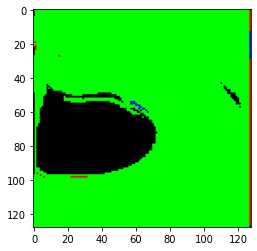

In [14]:
plt.imshow(rgb_arr)

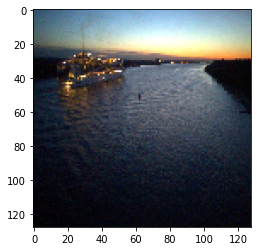

In [15]:
plt.imshow(images[0].permute(1,2,0))